In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [3]:
# Import data
df = pd.read_csv("/Users/shaonan/Desktop/EmoryMSBA2024/2023Fall/674_AI&ML/FinalProject_ClickPrediction/train_balanced.csv")

In [4]:
# Balance target variabl - click
from sklearn.utils import resample

# Separate majority and minority classes
df_majority = df[df.click==0]
df_minority = df[df.click==1]

# Downsample majority class
df_majority_downsampled = resample(df_majority, 
                                   replace=False,    # sample without replacement
                                   n_samples=len(df_minority),  # to match minority class
                                   random_state=123) # reproducible results

# Combine minority class with downsampled majority class
df_balanced = pd.concat([df_majority_downsampled, df_minority])

# Display new class counts
print(df_balanced.click.value_counts())

0    5434977
1    5434977
Name: click, dtype: int64


In [5]:
# one-hot encode
df_label_encoded = df_balanced.copy()

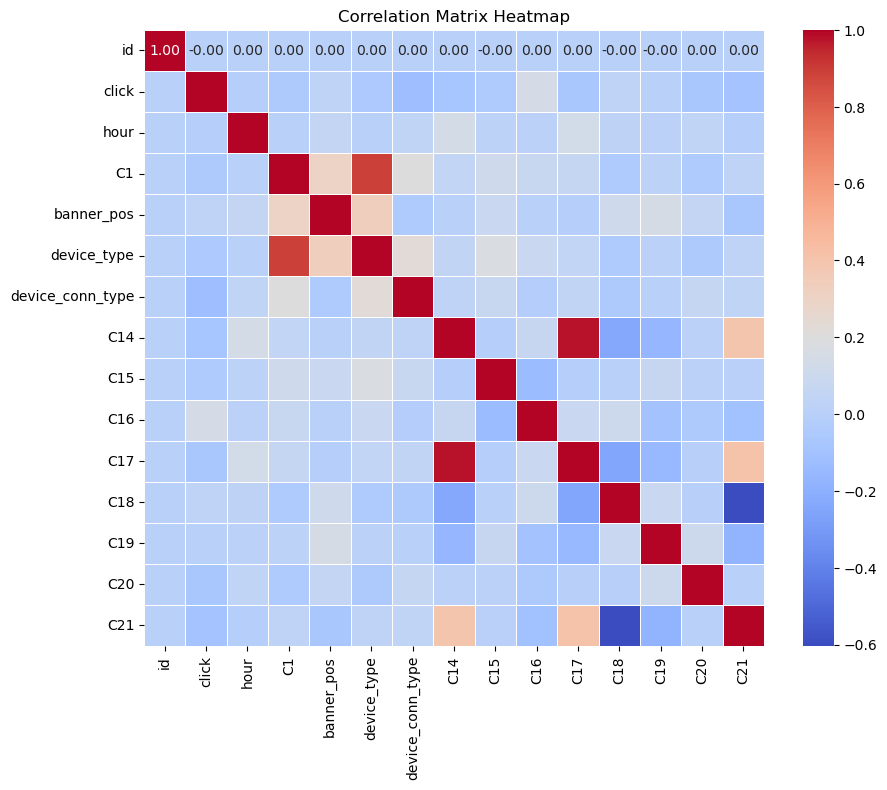

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = df_label_encoded.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title("Correlation Matrix Heatmap")
plt.show()

In [7]:
# Encodeing: label encode
categorical_variables = [
    'C1',
    'banner_pos',
    'site_id',
    'site_domain',
    'site_category',
    'app_id',
    'app_domain',
    'app_category',
    'device_id',
    'device_ip',
    'device_model',
    'device_type',
    'device_conn_type',
    'C14', 'C15', 'C16', 'C17', 'C18', 'C19', 'C20', 'C21'
]

label_encoders = {}
for column in categorical_variables:
    le = LabelEncoder()
    df_label_encoded[column] = le.fit_transform(df_label_encoded[column].astype(str))
    label_encoders[column] = le

# Now, your dataframe 'df' has all categorical columns encoded and can be used for Lasso


In [8]:
# X, y
# Define your features and target variable
X = df_label_encoded.drop('click', axis=1)
y = df_label_encoded['click']

In [9]:
# Scale the variables
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [10]:
# Alternative: PCA, no Lasso
from sklearn.decomposition import PCA

pca = PCA(n_components=0.95)  # Keep 95% of variance
X_pca = pca.fit_transform(X_scaled)
print("Explained variance by component:", pca.explained_variance_ratio_)

Explained variance by component: [0.12262428 0.10915325 0.09709326 0.08166529 0.06910893 0.05980765
 0.04510056 0.04395832 0.04347967 0.04341626 0.0418835  0.04085616
 0.03395626 0.03076525 0.02674046 0.02502716 0.02359496 0.0187604 ]


In [11]:
# Split the data
X_train, X_val, y_train, y_val = train_test_split(X_pca,  # dataset to be split ; X represents the feature matrix
                                                    y,  # dataset to be split ; y represents the target variable

                                                    test_size=0.2,  # a float number between 0.0 and 1.0 representing the proportion of the dataset to include in the test split
                                                                    # test_size=0.4 specifies that 40% of the data will be used for testing, and the remaining 60% for training
                                                    random_state=1, # controls the shuffling for reproducible output

                                                    stratify=y)

In [13]:
# Build Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score

# Initialize the logistic regression model
logistic_model = LogisticRegression(random_state=0, max_iter=1000000, solver='lbfgs')

# Train the model using the training set
logistic_model.fit(X_train, y_train)

# Prediction with probabilities
y_val_proba = logistic_model.predict_proba(X_val)

# Use only the probabilities for the positive class (click-through)
y_val_proba_click = y_val_proba[:, 1]

# Calculate log loss with probability estimates
print("Log Loss:", log_loss(y_val, y_val_proba_click))


Log Loss: 0.6693018001315325
